In [ ]:
!nvidia-smi

Wed May 14 10:25:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P8             14W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/yolov11
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/yolov11
 CITATION.cff	     markerpen.yaml    yolo11l-pose.pt
 CONTRIBUTING.md     mkdocs.yml        yolo11m-obb.pt
 datasets	     pyproject.toml    yolo11m-pose.pt
 data.yaml	     README.md	       yolo11n.pt
 docker		     README.zh-CN.md   yolov11-keypoints.ipynb
 docs		     runs	       yolov11-obb.ipynb
 examples	     test	      'yolov11 test.py'
 LICENSE	     tests
 markerpenobb.yaml   ultralytics


In [ ]:
#%pip install -qr requirements.txt # install dependencies
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
import ultralytics
ultralytics.checks()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolo11m-obb.yaml")  # build a new model from scratch
model = YOLO("yolo11m-obb.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="markerpenobb.yaml", epochs=300, imgsz=416, patience=0, cache=True)  # train the model

New https://pypi.org/project/ultralytics/8.3.133 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=markerpenobb.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, opti

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpenobb/train/labels... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [02:43<00:00,  1.22it/s]

train: New cache created: /content/gdrive/My Drive/yolov11/datasets/markerpenobb/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 199/199 [00:16<00:00, 12.37it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.5±0.4 MB/s, size: 396.1 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpenobb/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:54<00:00,  1.83s/it]

val: New cache created: /content/gdrive/My Drive/yolov11/datasets/markerpenobb/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 30/30 [00:03<00:00,  8.14it/s]


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 112 weight(decay=0.0), 122 weight(decay=0.0005), 121 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      3.56G        1.3      3.308       1.53         24        416: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         30         60      0.695      0.683      0.759      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      3.69G     0.6822       1.32       1.13         16        416: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         30         60      0.951      0.968       0.97      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300       3.8G     0.5966     0.5913      1.149         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         30         60       0.99          1      0.995      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      3.92G     0.5768     0.4939      1.147         29        416: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]


                   all         30         60      0.967          1      0.994      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      4.06G     0.6005     0.4835      1.151         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         60      0.967          1      0.993      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      4.19G     0.5861     0.4508       1.17         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         30         60      0.966          1      0.994      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300       4.3G     0.6353     0.4494      1.188         28        416: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.993          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      4.42G     0.6312     0.4579      1.163         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         60      0.967          1      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      4.54G      0.584     0.4232      1.166         32        416: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         30         60      0.977          1      0.994      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      4.66G     0.6276     0.4394      1.119         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         30         60      0.974          1       0.99      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      4.77G     0.6061     0.4206      1.235         13        416: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         30         60      0.968      0.995      0.991      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       4.9G     0.6137     0.4191      1.209         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         30         60      0.964          1       0.99      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      5.02G     0.6039     0.4272      1.171         34        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]

                   all         30         60      0.964          1      0.993      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      5.16G     0.6127     0.4336      1.153         38        416: 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         30         60      0.981          1      0.993        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      5.27G     0.5714     0.4111      1.135         32        416: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         30         60      0.982          1      0.986      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      5.38G     0.5569      0.389      1.125         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         30         60      0.982          1      0.991      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300       5.5G     0.5842     0.4001      1.138         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.81it/s]

                   all         30         60      0.984      0.997      0.993      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      5.64G     0.5777        0.4      1.107         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         30         60      0.997      0.983      0.995      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      5.74G     0.5626     0.3848      1.144         16        416: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         60      0.983      0.991      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      5.86G     0.5288     0.3731      1.182         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         30         60      0.967          1      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      5.97G     0.5771     0.3964      1.157         22        416: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         30         60      0.966          1      0.993      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      6.12G      0.575     0.4076      1.132         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all         30         60      0.967          1      0.994       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      6.23G     0.5469     0.3873      1.116         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         30         60      0.967          1      0.991      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      6.34G     0.5682     0.4032      1.109         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         60      0.967          1      0.982      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      6.46G     0.5423     0.3819       1.09         15        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         30         60      0.967          1      0.992      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      6.58G     0.5538     0.3757      1.111         25        416: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         30         60      0.933          1       0.98      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      6.71G     0.5557     0.3912      1.154         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         30         60      0.947          1      0.982      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      6.82G     0.5678     0.3953      1.142         34        416: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         30         60      0.967          1      0.992      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      6.92G     0.5812     0.3935      1.137         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         60      0.967          1      0.993      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      7.07G     0.5653     0.3833      1.142         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         30         60      0.966          1      0.993      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      7.17G     0.5727     0.3894      1.145         29        416: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         30         60      0.967          1      0.991      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      7.29G     0.5398     0.3795      1.117         17        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         30         60      0.983      0.983      0.994      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300       7.4G     0.5178     0.3679      1.115         34        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         30         60      0.978          1      0.994      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      4.21G     0.5318     0.3735      1.093         22        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         60      0.999          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      4.21G     0.5359      0.371      1.109         35        416: 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         60      0.999          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      4.21G     0.5212     0.3715      1.089         22        416: 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         30         60      0.999          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.21G     0.5216     0.3717      1.105         36        416: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         30         60      0.998          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      4.21G     0.5329     0.3716      1.077         25        416: 100%|██████████| 13/13 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         30         60          1      0.999      0.995       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      4.22G     0.4985     0.3609      1.113         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         60          1      0.999      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.29G     0.4969     0.3536      1.118         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         60      0.989      0.983      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       4.4G     0.5091     0.3627      1.057         21        416: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         30         60      0.964          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      4.52G      0.518     0.3616      1.108         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         30         60      0.992          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      4.65G     0.5016     0.3591      1.064         33        416: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         30         60      0.968          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      4.77G        0.5     0.3593      1.094         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         30         60      0.979      0.983      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      4.89G      0.513     0.3635      1.133         29        416: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         30         60      0.993          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      5.02G     0.5036     0.3535      1.082         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         60      0.997          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      5.14G     0.5311     0.3557      1.106         31        416: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         30         60      0.995          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      5.25G      0.523     0.3676      1.149         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         30         60          1          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      5.37G     0.5148     0.3605      1.106         31        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         30         60      0.982          1      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      5.49G     0.5032       0.36      1.088         25        416: 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.996          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      5.61G      0.513     0.3592       1.12         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         30         60      0.983          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      5.74G     0.5104     0.3593      1.104         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         30         60      0.983          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      5.84G     0.4959     0.3543      1.119         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all         30         60      0.984      0.996      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      5.98G     0.4743     0.3387      1.098         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         60      0.981          1      0.993      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      6.09G     0.4645     0.3334      1.085         23        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all         30         60      0.967          1      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      6.21G      0.467     0.3371      1.102         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.967          1      0.992       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      6.32G     0.4739     0.3421      1.099         29        416: 100%|██████████| 13/13 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         30         60      0.967          1      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      6.45G     0.4815       0.35      1.074         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         30         60      0.964          1      0.993      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      6.56G     0.4902     0.3508      1.115         11        416: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         30         60      0.967          1      0.994      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      6.69G     0.4833     0.3434      1.127         11        416: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all         30         60      0.966          1      0.993      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      6.81G     0.4853     0.3531      1.103         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all         30         60       0.97          1      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      6.94G     0.5191     0.3595      1.124         19        416: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]


                   all         30         60      0.975          1      0.994      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      7.05G     0.4752     0.3469      1.088         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.976          1      0.994      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      7.17G     0.4654     0.3316      1.093         30        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         30         60      0.967          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      7.29G     0.4912     0.3404      1.112         13        416: 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         60      0.967          1      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      7.43G     0.4678     0.3409      1.082         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         60      0.967          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      4.17G     0.4498     0.3298      1.077         32        416: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         30         60      0.983          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      4.17G     0.4746     0.3482       1.09         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         30         60       0.98          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      4.17G     0.4479     0.3255      1.065         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         60      0.981          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      4.17G     0.4648     0.3428      1.122         34        416: 100%|██████████| 13/13 [00:04<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         60          1      0.999      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      4.17G      0.437     0.3292      1.073         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.983          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      4.21G     0.4559     0.3354      1.055         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         30         60      0.985          1      0.995      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      4.28G     0.4656     0.3285      1.056         22        416: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         30         60      0.981          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.42G     0.4586     0.3312      1.105         15        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         30         60       0.98          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.53G     0.4487     0.3289      1.054         30        416: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         30         60      0.994          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      4.66G       0.47      0.341      1.054         31        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         30         60      0.967          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      4.76G     0.4644     0.3236      1.156         33        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         30         60      0.967          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      4.89G     0.4478     0.3287      1.075         35        416: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         30         60      0.967          1      0.993      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300         5G     0.4653     0.3352      1.081         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         30         60      0.967          1      0.993      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      5.13G     0.5033     0.3624      1.066         18        416: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         30         60      0.967          1      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      5.23G     0.4683      0.343      1.107         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         60      0.967          1      0.994      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      5.37G     0.4649     0.3218      1.107         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         60      0.967          1      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300       5.5G     0.4514     0.3308      1.085         30        416: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         60      0.966          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      5.61G     0.4335      0.323      1.059         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         30         60      0.967          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      5.72G     0.4253     0.3192      1.062         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         30         60      0.966          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      5.85G     0.4443     0.3249      1.071         29        416: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         30         60      0.967          1      0.993      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      5.97G      0.435     0.3202      1.074         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all         30         60      0.967          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      6.08G     0.4358     0.3195      1.065         26        416: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         30         60      0.995          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      6.21G     0.4086     0.3061      1.056         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         60      0.996          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      6.34G     0.4367      0.323      1.051         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all         30         60      0.968      0.993      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      6.44G     0.4273     0.3095      1.061         28        416: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         30         60      0.984      0.996      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      6.57G      0.432     0.3186      1.063         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         30         60      0.981          1      0.993      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      6.67G     0.4324     0.3156       1.05         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         30         60      0.981          1      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300       6.8G     0.4549     0.3177      1.074         21        416: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         30         60      0.981          1      0.992      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      6.92G     0.4675     0.3372      1.105         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         30         60      0.982          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      7.04G     0.4527     0.3197      1.066         23        416: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all         30         60      0.983          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      7.16G     0.4338     0.3174      1.052         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         30         60       0.98          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      7.28G     0.4492      0.319      1.107         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]


                   all         30         60      0.984      0.997      0.994      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      7.41G     0.4367     0.3173      1.074         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         30         60      0.979          1      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300       4.2G     0.4368      0.326      1.048         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         30         60      0.981          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300       4.2G     0.4545     0.3335      1.061         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         30         60      0.985          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300       4.2G     0.4274     0.3161       1.04         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all         30         60      0.995          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300       4.2G     0.4341     0.3194      1.086         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         30         60      0.983          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300       4.2G     0.4125     0.3077      1.056         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         30         60      0.967          1      0.993      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      4.24G     0.4332     0.3207      1.077         18        416: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         60      0.967          1      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      4.28G     0.4293     0.3223      1.059         39        416: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         30         60      0.965          1       0.99      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300       4.4G     0.4239     0.3105      1.066         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         60      0.964          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      4.52G     0.4096     0.3017      1.039         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         30         60      0.997          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      4.64G     0.4223     0.3103      1.079         25        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.995          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.76G     0.4098     0.3052      1.056         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         30         60          1      0.999      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      4.89G     0.4089      0.305       1.06         33        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         30         60      0.997          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300         5G     0.4195     0.3048      1.071         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         60      0.983          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      5.12G      0.419     0.3021      1.054         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         30         60      0.967          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      5.26G     0.4103     0.3055      1.081         19        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]


                   all         30         60      0.967          1      0.995      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      5.37G     0.4013     0.3008      1.058         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.981          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      5.48G     0.4225     0.3093      1.088         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         60          1          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300       5.6G      0.401     0.2973      1.071         18        416: 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         30         60      0.999          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      5.73G     0.4085     0.2964      1.049         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         30         60      0.999          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      5.84G     0.4012     0.2966      1.057         19        416: 100%|██████████| 13/13 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         30         60      0.998          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      5.96G        0.4     0.2917      1.059         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all         30         60          1      0.998      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      6.08G     0.4129     0.3074      1.056         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         60       0.99          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      6.21G     0.3794     0.2874      1.055         28        416: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all         30         60          1      0.997      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      6.32G     0.4101     0.3055      1.085         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         60          1      0.998      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      6.44G     0.4232     0.3182      1.054         33        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         30         60      0.997          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      6.56G     0.4081     0.3056      1.076         17        416: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         60          1      0.998      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300       6.7G      0.394     0.2941      1.034         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]

                   all         30         60      0.989      0.983      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      6.81G     0.4075     0.3005      1.063         24        416: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         30         60      0.991      0.983      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      6.93G     0.4068     0.3044      1.032         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all         30         60      0.998          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      7.04G     0.3977     0.2927      1.045         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         30         60      0.997      0.983      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      7.17G     0.3979     0.2994      1.057         18        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         60          1      0.998      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      7.29G     0.3622     0.2782      1.042         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         60      0.998          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      7.41G     0.3889     0.2925      1.059         29        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         30         60      0.999          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      4.13G     0.3752     0.2825      1.048         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         60      0.999          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.13G     0.4082     0.3001      1.092         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         30         60      0.999          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      4.13G     0.4006     0.3038      1.067         28        416: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         30         60      0.999          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      4.13G     0.3913     0.2945      1.046         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all         30         60      0.997          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      4.16G     0.3874     0.2896      1.038         32        416: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         30         60      0.967          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      4.21G     0.3647     0.2825       1.07         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         30         60      0.969          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      4.28G     0.3977     0.2908      1.057         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         60      0.981          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      4.41G     0.3949     0.2912      1.046         19        416: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         30         60      0.978          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      4.52G     0.3823     0.2833      1.039         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         30         60      0.977          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      4.64G     0.3931      0.295      1.071         24        416: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         30         60      0.971          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      4.77G     0.3737     0.2827      1.079         29        416: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.981          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      4.88G     0.3797     0.2845       1.05         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]

                   all         30         60      0.985          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300         5G     0.3938     0.2977      1.069         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         30         60       0.98          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      5.13G     0.3872     0.2851      1.067         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         30         60      0.983          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      5.24G     0.3868     0.2918       1.05         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         30         60      0.981          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      5.37G     0.3907     0.2975      1.065         21        416: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all         30         60      0.991          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      5.47G     0.3749     0.2907      1.031         30        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         60      0.981          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      5.61G     0.3683      0.282      1.065         24        416: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         30         60      0.979          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      5.72G     0.3819     0.2843      1.056         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         60      0.978          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      5.85G     0.3603     0.2719      1.069         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         30         60       0.98          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      5.95G     0.3589     0.2832      1.071         18        416: 100%|██████████| 13/13 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         60      0.985          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      6.09G     0.3873     0.2926      1.064         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         30         60      0.989          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      6.21G     0.3619      0.277      1.049         28        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         30         60      0.985          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      6.32G     0.3702     0.2794      1.053         23        416: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         30         60          1      0.998      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      6.44G     0.3689     0.2782      1.047         36        416: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


                   all         30         60      0.994          1      0.995       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      6.57G     0.3773     0.2853      1.078         14        416: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all         30         60      0.996          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      6.69G     0.3954     0.2907      1.069         34        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all         30         60      0.995          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300       6.8G     0.3571     0.2806      1.064         24        416: 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all         30         60      0.983          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      6.92G     0.3703     0.2718       1.03         36        416: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         30         60      0.996          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      7.06G     0.3639     0.2748      1.056         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         30         60      0.994          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      7.17G      0.357     0.2714      1.064         13        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         30         60      0.999          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      7.28G     0.3525     0.2793      1.054         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all         30         60       0.98          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300       7.4G     0.3711     0.2833      1.049         29        416: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         30         60      0.984          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      4.19G      0.363     0.2778       1.06         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         60      0.978          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      4.19G     0.3814     0.2879      1.042         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         30         60       0.97          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      4.19G     0.3541      0.277      1.034         17        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         30         60      0.968          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      4.19G     0.3476     0.2688      1.047         34        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         60      0.967          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      4.19G     0.3543     0.2741      1.064         16        416: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         30         60      0.967          1      0.995      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300       4.2G     0.3737     0.2845      1.053         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         30         60      0.967          1      0.995       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      4.29G     0.3462     0.2645      1.056         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         30         60      0.967          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300       4.4G     0.3702     0.2794      1.045         33        416: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         30         60          1      0.986      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      4.53G     0.3496     0.2651      1.044         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all         30         60      0.977          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      4.65G     0.3491     0.2691      1.027         29        416: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         30         60      0.967          1      0.994      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      4.76G     0.3419     0.2656      1.052         29        416: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         30         60       0.97          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      4.88G     0.3357     0.2621      1.048         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      5.01G     0.3608     0.2764      1.036         37        416: 100%|██████████| 13/13 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         30         60      0.967          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      5.13G     0.3431     0.2702      1.017         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.968          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      5.24G     0.3495      0.274      1.042         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         30         60      0.967          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      5.36G     0.3515     0.2748       1.05         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      5.48G     0.3411     0.2647      1.032         17        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         30         60      0.977          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      5.61G     0.3285     0.2594      1.023         22        416: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         30         60       0.97          1      0.994      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      5.72G      0.357     0.2728      1.052         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all         30         60      0.968          1      0.994      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      5.84G     0.3454     0.2751      1.051         15        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all         30         60      0.968          1      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      5.97G     0.3465     0.2672      1.037         35        416: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         30         60      0.968          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      6.08G     0.3495     0.2702      1.043         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.968          1      0.995      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300       6.2G     0.3537     0.2688      1.076         17        416: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         30         60      0.978          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      6.32G     0.3273     0.2605      1.046         27        416: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         30         60      0.978          1      0.994      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      6.45G     0.3351     0.2625      1.035         33        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         60      0.984      0.999      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      6.73G      0.348     0.2687      1.028         23        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         30         60      0.981          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300       6.8G     0.3353     0.2602      1.066         41        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]

                   all         30         60      0.975          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      6.86G     0.3372     0.2725      1.065         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         30         60      0.967          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      6.95G     0.3413       0.27      1.039         41        416: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      7.03G     0.3187     0.2525      1.033         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      7.15G     0.3344     0.2595      1.053         31        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         30         60      0.967          1      0.994       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      7.26G     0.3249     0.2554      1.057         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         30         60      0.967          1      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      7.39G     0.3126     0.2542      1.041         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      4.19G     0.3334     0.2628      1.057         30        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all         30         60      0.984      0.996      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      4.19G     0.3281     0.2558      1.052         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.967          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      4.19G     0.3319     0.2579       1.04         27        416: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         30         60      0.967          1      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      4.19G     0.3372     0.2593      1.036         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all         30         60      0.984      0.998      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      4.19G     0.3294     0.2604      1.031         37        416: 100%|██████████| 13/13 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all         30         60      0.983          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      4.23G     0.3424     0.2582      1.066         25        416: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all         30         60      0.976          1      0.994      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      4.27G     0.3303     0.2612      1.062         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all         30         60      0.968          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      4.41G     0.3228     0.2587      1.054         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]


                   all         30         60      0.967          1      0.994      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      4.53G      0.316     0.2533       1.02         24        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         30         60      0.968          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      4.64G      0.335     0.2564      1.051         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         30         60      0.968          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      4.76G     0.3322     0.2663      1.051         31        416: 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         30         60      0.967          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      4.89G     0.3266     0.2609      1.074         31        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all         30         60      0.966          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      5.01G     0.3179     0.2499      1.015         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         30         60      0.967          1      0.994      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      5.12G     0.3119     0.2476      1.067         29        416: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         30         60      0.967          1      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      5.24G      0.324     0.2594      1.054         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all         30         60      0.967          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      5.36G     0.3097     0.2436       1.05         13        416: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         30         60      0.967          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      5.49G      0.301     0.2437       1.06         36        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all         30         60      0.967          1      0.994      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300       5.6G     0.3121       0.25      1.047         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         30         60      0.968          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      5.71G      0.314      0.248      1.033         23        416: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]


                   all         30         60       0.98          1      0.995       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      5.85G     0.3182     0.2475      1.037         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         60      0.982          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      5.96G     0.3005     0.2417      1.025         21        416: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         30         60      0.967          1      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      6.09G      0.311     0.2453      1.016         23        416: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         30         60      0.967          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      6.19G     0.3235     0.2516      1.058         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all         30         60      0.967          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      6.33G     0.3249     0.2501      1.048         22        416: 100%|██████████| 13/13 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         30         60      0.967          1      0.994      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      6.44G     0.2962     0.2416       1.05         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         30         60      0.967          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      6.56G     0.3211      0.254      1.055         22        416: 100%|██████████| 13/13 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         30         60      0.968          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      6.68G      0.314     0.2553      1.057         27        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         30         60      0.968          1      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      6.82G     0.3178     0.2548      1.035         18        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         30         60      0.973          1      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      6.93G     0.2938      0.242      1.017         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         30         60      0.971          1      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      7.04G     0.3008     0.2414      1.033         13        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         60      0.967          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      7.16G     0.3215     0.2502      1.067         34        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all         30         60      0.968          1      0.994       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300       7.3G     0.3147     0.2507      1.039         20        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all         30         60      0.968          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      7.41G     0.3085     0.2433      1.051         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all         30         60      0.968          1      0.994      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300       4.2G     0.3179     0.2554      1.034         12        416: 100%|██████████| 13/13 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


                   all         30         60       0.98          1      0.995      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300       4.2G     0.3036     0.2397      1.039         17        416: 100%|██████████| 13/13 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         30         60      0.982          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300       4.2G     0.2968     0.2471      1.049         31        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         30         60      0.982          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300       4.2G     0.3096     0.2493      1.032         24        416: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         30         60      0.981          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300       4.2G     0.2972     0.2404      1.037         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]

                   all         30         60       0.98          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      4.24G     0.3044     0.2426      1.017         27        416: 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         30         60       0.98          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300       4.3G     0.2925     0.2351      1.043         16        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         30         60      0.981          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      4.41G     0.2983     0.2432      1.048         26        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.967          1      0.994      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      4.52G     0.2962     0.2427      1.035         28        416: 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         30         60      0.978          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      4.64G     0.3161     0.2526      1.054         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         60      0.984      0.998      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      4.76G     0.2858     0.2358       1.03         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         30         60      0.977          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      4.88G     0.3068     0.2427      1.018         17        416: 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         30         60      0.983          1      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300         5G     0.2851      0.231      1.022         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]

                   all         30         60      0.979          1      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      5.12G     0.2933     0.2341      1.025         17        416: 100%|██████████| 13/13 [00:04<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]


                   all         30         60       0.98          1      0.995      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      5.25G     0.2886     0.2329       1.02         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.981          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      5.37G     0.3024      0.245       1.04         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         30         60      0.981          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      5.48G     0.3001     0.2373      1.019         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all         30         60      0.992          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      5.59G     0.2799     0.2349      1.031         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all         30         60      0.982          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      5.74G     0.2929      0.241      1.034         27        416: 100%|██████████| 13/13 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         30         60      0.983          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      5.83G     0.2933     0.2377      1.032         13        416: 100%|██████████| 13/13 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60          1      0.996      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      5.96G     0.2885      0.248      1.024         25        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         30         60      0.996          1      0.995      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      6.08G     0.2832     0.2373      1.051         36        416: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all         30         60      0.998          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      6.21G     0.2957     0.2327      1.041         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         30         60      0.984      0.999      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      6.33G     0.2884     0.2335      1.014         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         30         60      0.984      0.999      0.995      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      6.45G     0.2842     0.2387      1.037         35        416: 100%|██████████| 13/13 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         30         60      0.984      0.997      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      6.55G     0.2746     0.2305      1.025         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all         30         60      0.982      0.983      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      6.69G     0.2963     0.2369      1.034         19        416: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         30         60      0.982      0.983      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300       6.8G     0.2808     0.2316      1.053         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         30         60      0.982      0.983      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      6.93G      0.277     0.2267      1.028         19        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         30         60      0.982      0.983      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      7.03G     0.2895      0.231      1.042         22        416: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all         30         60      0.983      0.983      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      7.18G     0.2849     0.2348      1.038         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         30         60      0.987      0.983      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      7.29G     0.2683     0.2292      1.037         38        416: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         30         60      0.984      0.996      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300       7.4G     0.2864     0.2318       1.04         31        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         30         60      0.993          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300       4.1G     0.2901     0.2348      1.056         27        416: 100%|██████████| 13/13 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         30         60      0.995          1      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300       4.1G     0.2826     0.2317      1.033         34        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         60          1      0.993      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300       4.1G     0.2787     0.2315      1.051         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all         30         60          1      0.994      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300       4.1G     0.2853     0.2322      1.032         22        416: 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         30         60          1      0.998      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      4.14G     0.2713     0.2235      1.023         21        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all         30         60          1      0.998      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300       4.2G     0.2781       0.23      1.023         28        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         30         60      0.984          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300       4.3G      0.297     0.2373       1.04         24        416: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all         30         60      0.983          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      4.41G     0.2646     0.2217       1.03         24        416: 100%|██████████| 13/13 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         30         60      0.996          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      4.53G     0.2704     0.2267      1.032         23        416: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all         30         60      0.997          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      4.66G     0.2675     0.2223      1.006         23        416: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all         30         60      0.997          1      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      4.77G     0.2676      0.224      1.035         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         30         60      0.997          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      4.89G     0.2766     0.2253      1.029         18        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         30         60      0.989          1      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      5.01G     0.2711     0.2224      1.038         22        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         30         60      0.983          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      5.13G     0.2734      0.227       1.02         20        416: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all         30         60      0.983      0.993      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      5.26G     0.2739     0.2279      1.044         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]

                   all         30         60      0.984      0.994      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      5.37G     0.2728     0.2283       1.02         24        416: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         30         60      0.984      0.995      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      5.49G     0.2695     0.2249      1.014         25        416: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         60      0.983       0.99      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      5.61G     0.2626     0.2192      1.028         17        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all         30         60      0.983      0.989      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      5.72G     0.2588     0.2171      1.033         26        416: 100%|██████████| 13/13 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         30         60      0.967          1      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      5.85G     0.2549     0.2189      1.042         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all         30         60      0.989      0.983      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      5.95G      0.263     0.2204      1.036         29        416: 100%|██████████| 13/13 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all         30         60       0.99      0.983      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      6.09G       0.27     0.2226      1.036         17        416: 100%|██████████| 13/13 [00:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         30         60      0.984      0.983      0.995       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300       6.2G     0.2567     0.2165      1.053         24        416: 100%|██████████| 13/13 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         30         60      0.979          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      6.32G      0.252      0.215      1.025         21        416: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         30         60      0.979          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      6.43G     0.2474      0.213      1.022         28        416: 100%|██████████| 13/13 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all         30         60       0.98          1      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      6.56G     0.2697     0.2252      1.031         20        416: 100%|██████████| 13/13 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         30         60       0.98          1      0.995      0.924


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      6.75G     0.2499     0.2021      1.032         14        416: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         30         60      0.983       0.99      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      6.82G     0.2457     0.2009       1.04         14        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all         30         60      0.967          1      0.995      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      6.92G     0.2443     0.1982      1.022         14        416: 100%|██████████| 13/13 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all         30         60      0.967          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      7.04G     0.2456     0.2033      1.046         14        416: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all         30         60      0.967          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      7.16G     0.2468     0.2022      1.026         14        416: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]


                   all         30         60      0.967          1      0.995      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      7.27G      0.242     0.2029       1.01         14        416: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all         30         60      0.967          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300       7.4G     0.2429     0.1988      1.009         14        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all         30         60      0.967          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      4.19G     0.2393     0.2033      1.033         14        416: 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all         30         60      0.967          1      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      4.19G      0.242      0.194      1.017         14        416: 100%|██████████| 13/13 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all         30         60      0.967          1      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      4.19G     0.2493     0.2051      1.039         14        416: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         30         60      0.967          1      0.994      0.918



300 epochs completed in 0.458 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 42.3MB
Optimizer stripped from runs/obb/train/weights/best.pt, 42.3MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-obb summary (fused): 134 layers, 20,879,254 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]


                   all         30         60      0.995          1      0.995      0.934
Speed: 0.1ms preprocess, 5.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/obb/train


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc384e59e50>
curves: []
curves_results: []
fitness: np.float64(0.9404100296485127)
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.93434])
names: {0: 'CAP'}
plot: True
results_dict: {'metrics/precision(B)': np.float64(0.9952284356655942), 'metrics/recall(B)': np.float64(1.0), 'metrics/mAP50(B)': np.float64(0.995), 'metrics/mAP50-95(B)': np.float64(0.9343444773872364), 'fitness': np.float64(0.9404100296485127)}
save_dir: PosixPath('runs/obb/train')
speed: {'preprocess': 0.12496060000254754, 'inference': 5.709569133326416, 'loss': 0.0007203000071361505, 'postprocess': 3.8823419333311904}

In [ ]:
model = YOLO("runs/obb/train/weights/best.pt")
model.val()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-obb summary (fused): 134 layers, 20,879,254 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 160.5±55.5 MB/s, size: 428.8 KB)


val: Scanning /content/gdrive/My Drive/yolov11/datasets/markerpenobb/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]


                   all         30         60      0.995          1      0.995      0.934
Speed: 1.3ms preprocess, 20.6ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/obb/val


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cc36b307a50>
curves: []
curves_results: []
fitness: np.float64(0.9398849329756835)
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.93376])
names: {0: 'CAP'}
plot: True
results_dict: {'metrics/precision(B)': np.float64(0.9953153563763836), 'metrics/recall(B)': np.float64(1.0), 'metrics/mAP50(B)': np.float64(0.995), 'metrics/mAP50-95(B)': np.float64(0.9337610366396483), 'fitness': np.float64(0.9398849329756835)}
save_dir: PosixPath('runs/obb/val')
speed: {'preprocess': 1.321738366671828, 'inference': 20.607602833327594, 'loss': 0.0010857000082372301, 'postprocess': 6.258197900009085}

In [ ]:
model = YOLO("runs/obb/train/weights/best.pt")
model(source="datasets/markerpenobb/test/images", conf=0.5, save=True)


image 1/5 /content/gdrive/MyDrive/yolov11/datasets/markerpenobb/test/images/20F8FA10-F0CA-4527-A36E-E5FCC6C1B3BC_jpeg.rf.e20a692c9a59eb1b037e9b4b08f43224.jpg: 416x320 None59.2ms
image 2/5 /content/gdrive/MyDrive/yolov11/datasets/markerpenobb/test/images/74CF24FD-085D-46FE-8AB8-9FC26B2503C4_jpeg.rf.a0ced774667ce069498dc57ceaaa52e4.jpg: 416x320 None20.2ms
image 3/5 /content/gdrive/MyDrive/yolov11/datasets/markerpenobb/test/images/91316E7F-2F7C-4A71-A70A-FC4533C9C076_jpeg.rf.2664f9c929ec84940b3b111dbc323dc2.jpg: 416x320 None19.0ms
image 4/5 /content/gdrive/MyDrive/yolov11/datasets/markerpenobb/test/images/E83BE283-A312-4CE6-958C-11D96CF559C6_jpeg.rf.5cadf99f41170893ffd51684345959a7.jpg: 416x320 None19.0ms
image 5/5 /content/gdrive/MyDrive/yolov11/datasets/markerpenobb/test/images/FC99E6C5-7009-417E-AD30-6A73EFFEE323_jpeg.rf.00c9a4221d2f4348c9e6a7cd43cdc505.jpg: 416x320 None19.0ms
Speed: 2.0ms preprocess, 27.3ms inference, 3.2ms postprocess per image at shape (1, 3, 416, 320)
Results save

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'CAP'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[178, 186, 186],
         [183, 191, 191],
         [186, 194, 194],
         ...,
         [140, 161, 169],
         [136, 157, 165],
         [132, 153, 161]],
 
        [[185, 193, 193],
         [190, 198, 198],
         [191, 199, 199],
         ...,
         [142, 163, 171],
         [136, 157, 165],
         [130, 151, 159]],
 
        [[185, 193, 193],
         [190, 198, 198],
         [192, 200, 200],
         ...,
         [143, 164, 172],
         [135, 156, 164],
         [128, 149, 157]],
 
        ...,
 
        [[139, 162, 170],
         [138, 161, 169],
         [136, 159, 167],
         ...,
         [144, 165, 166],
         [153, 174, 175],
         [151, 172, 173]],
 
        [[135, 158, 166],
         [134, 157, 165],
         [134, 157, 165],
         ...,
         [142, 163, 164

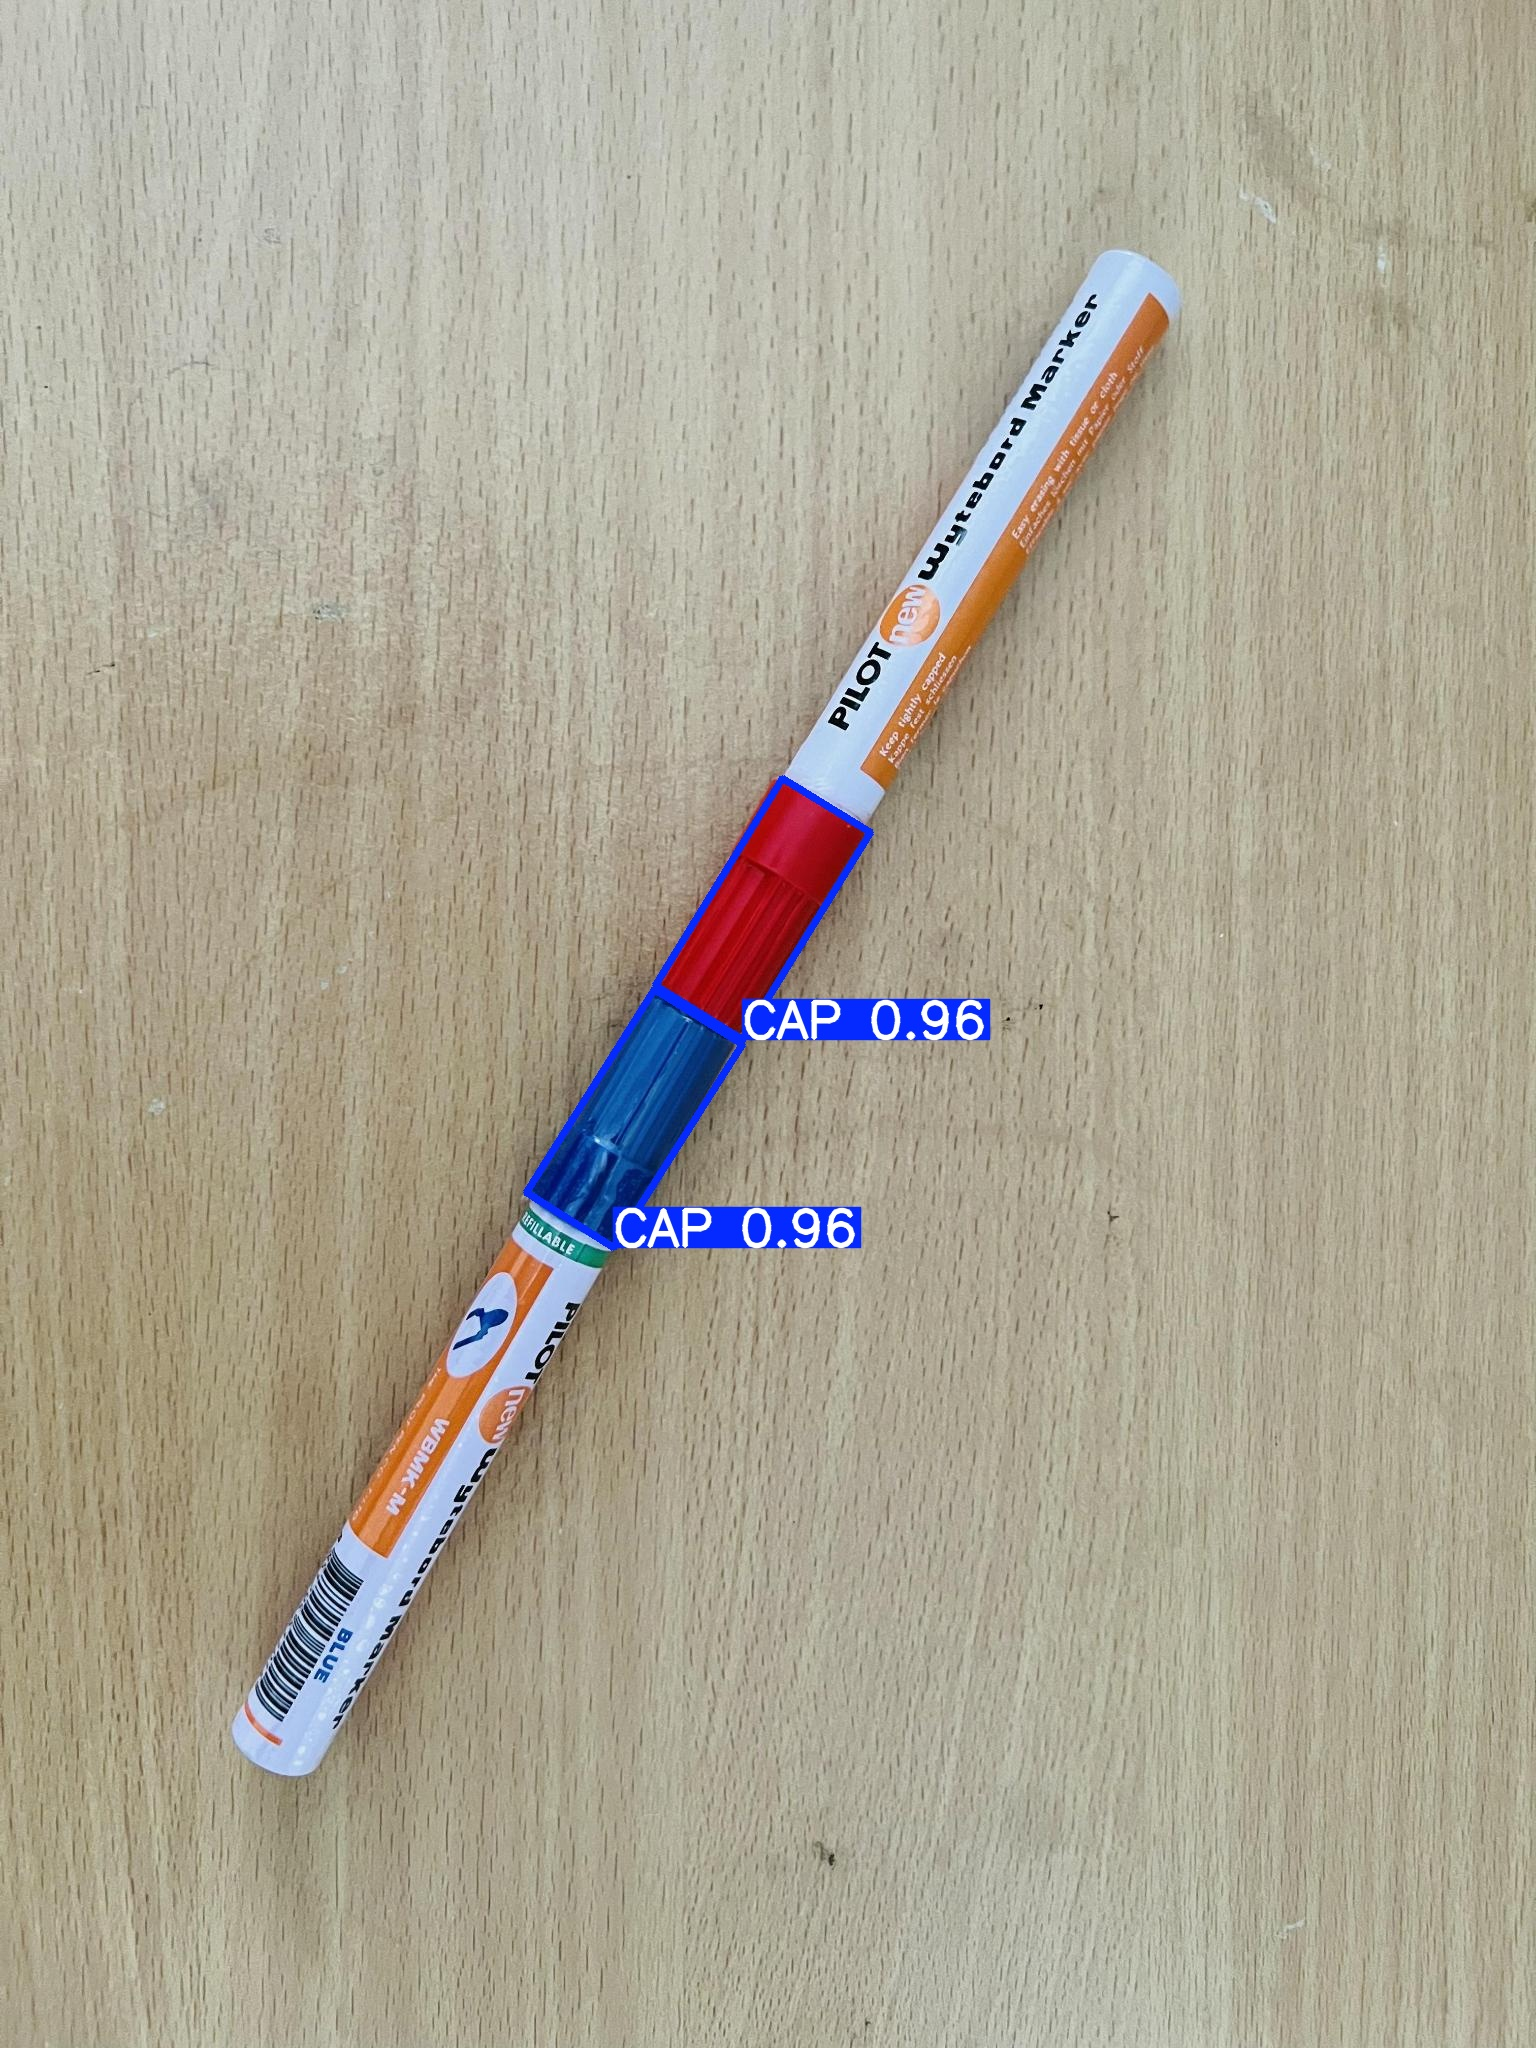

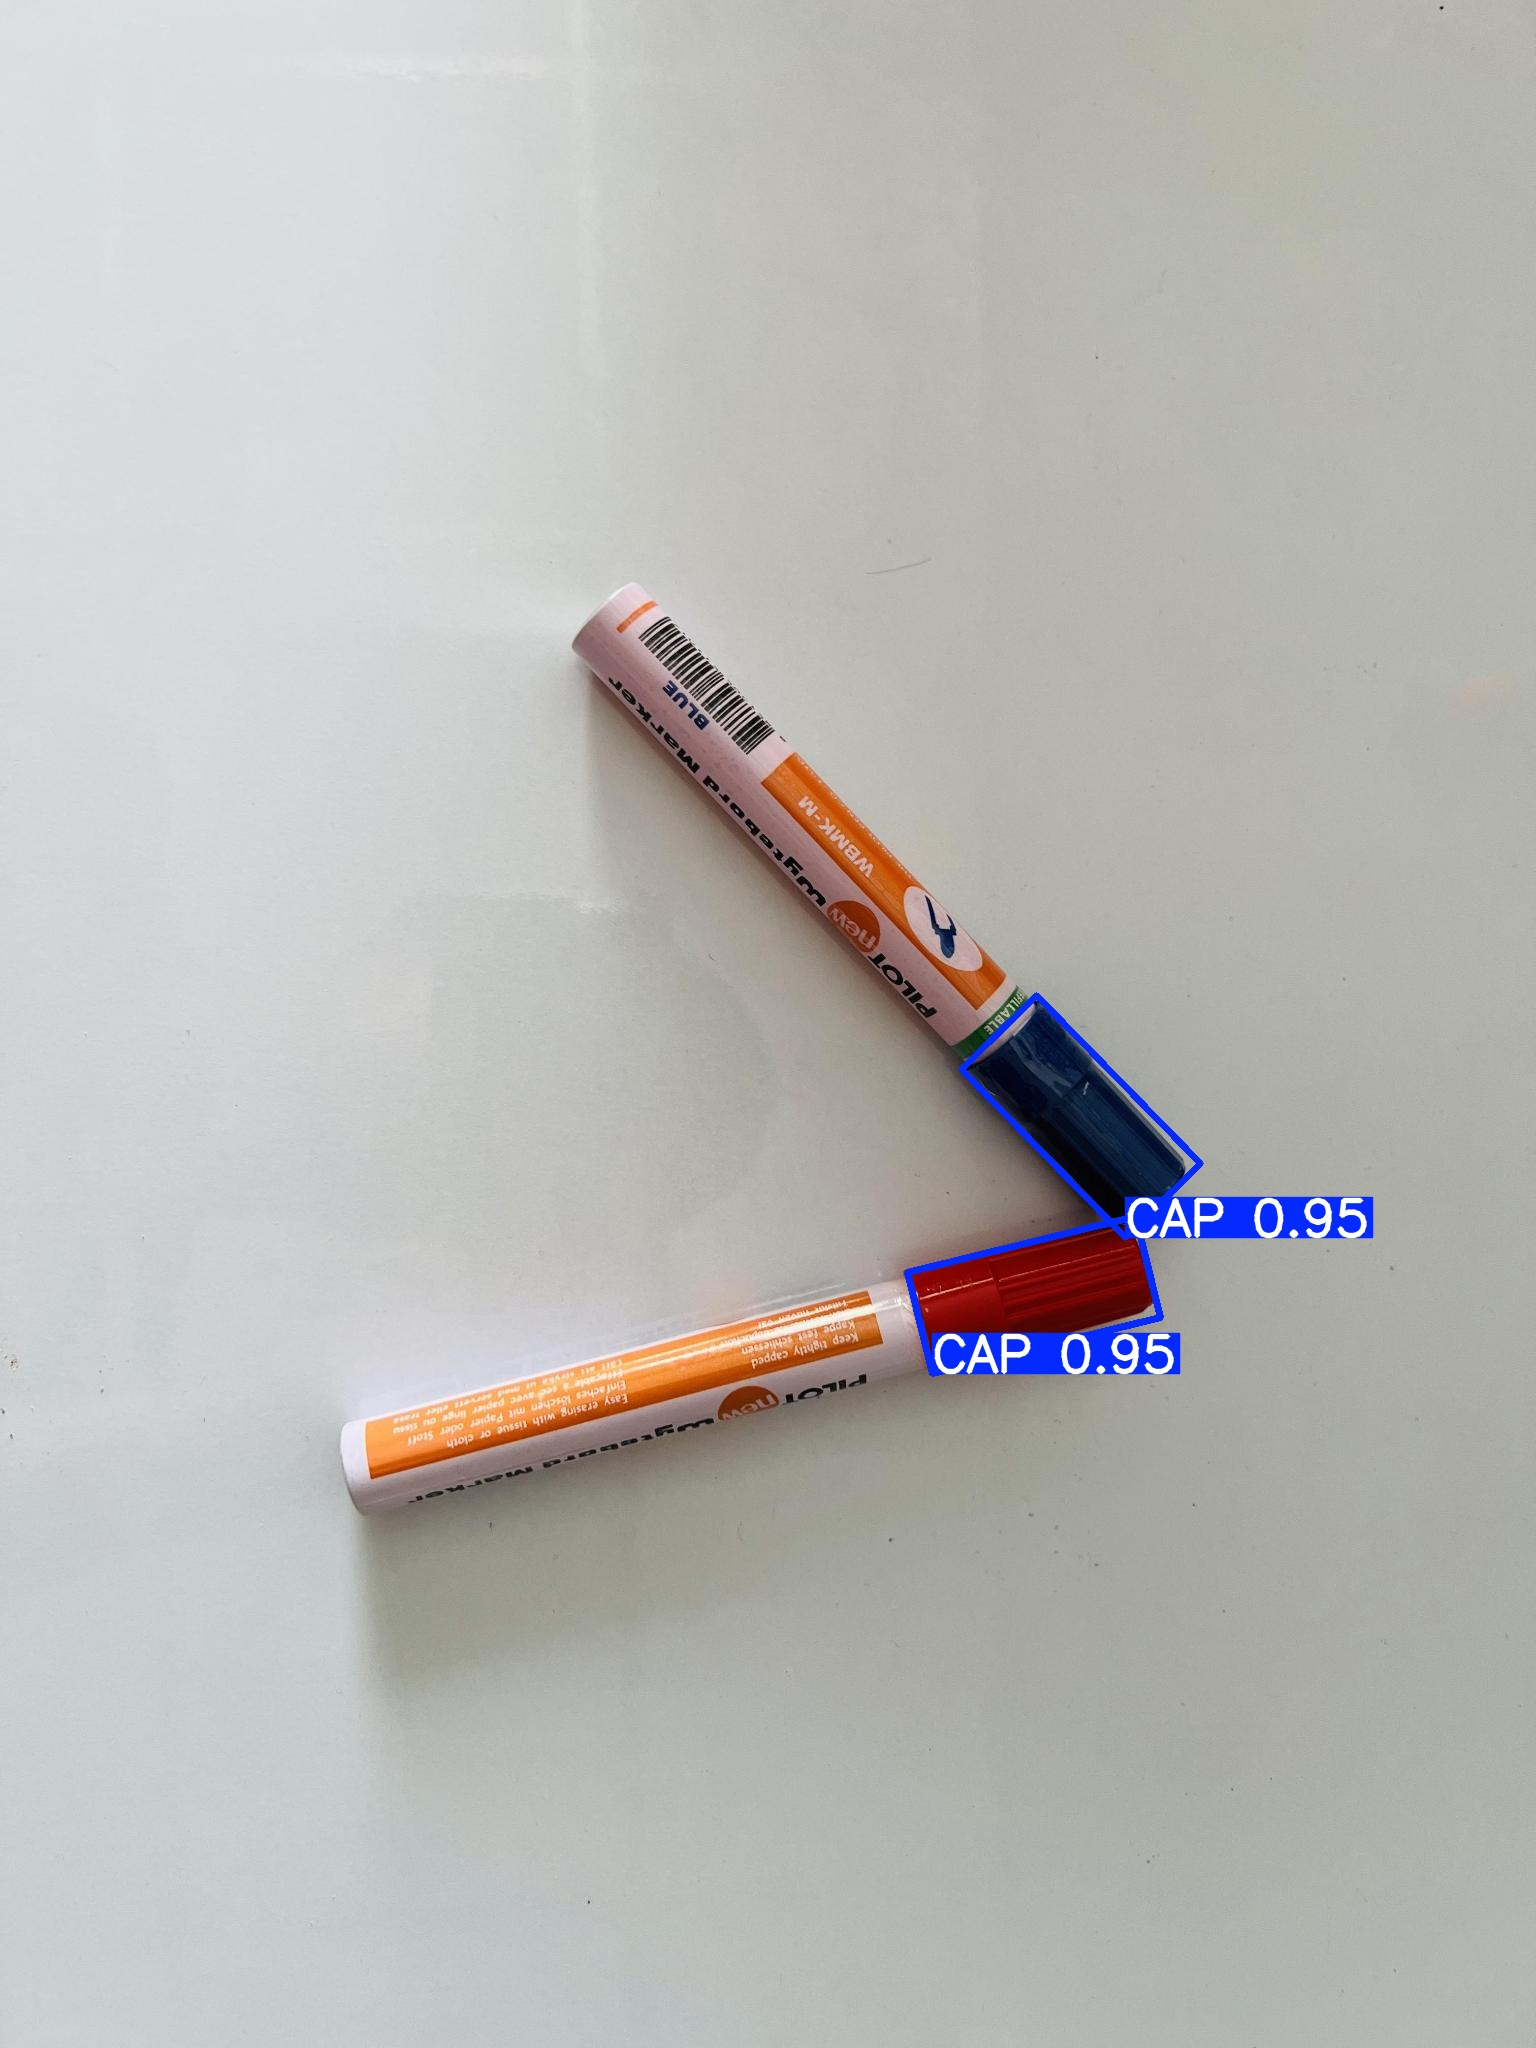

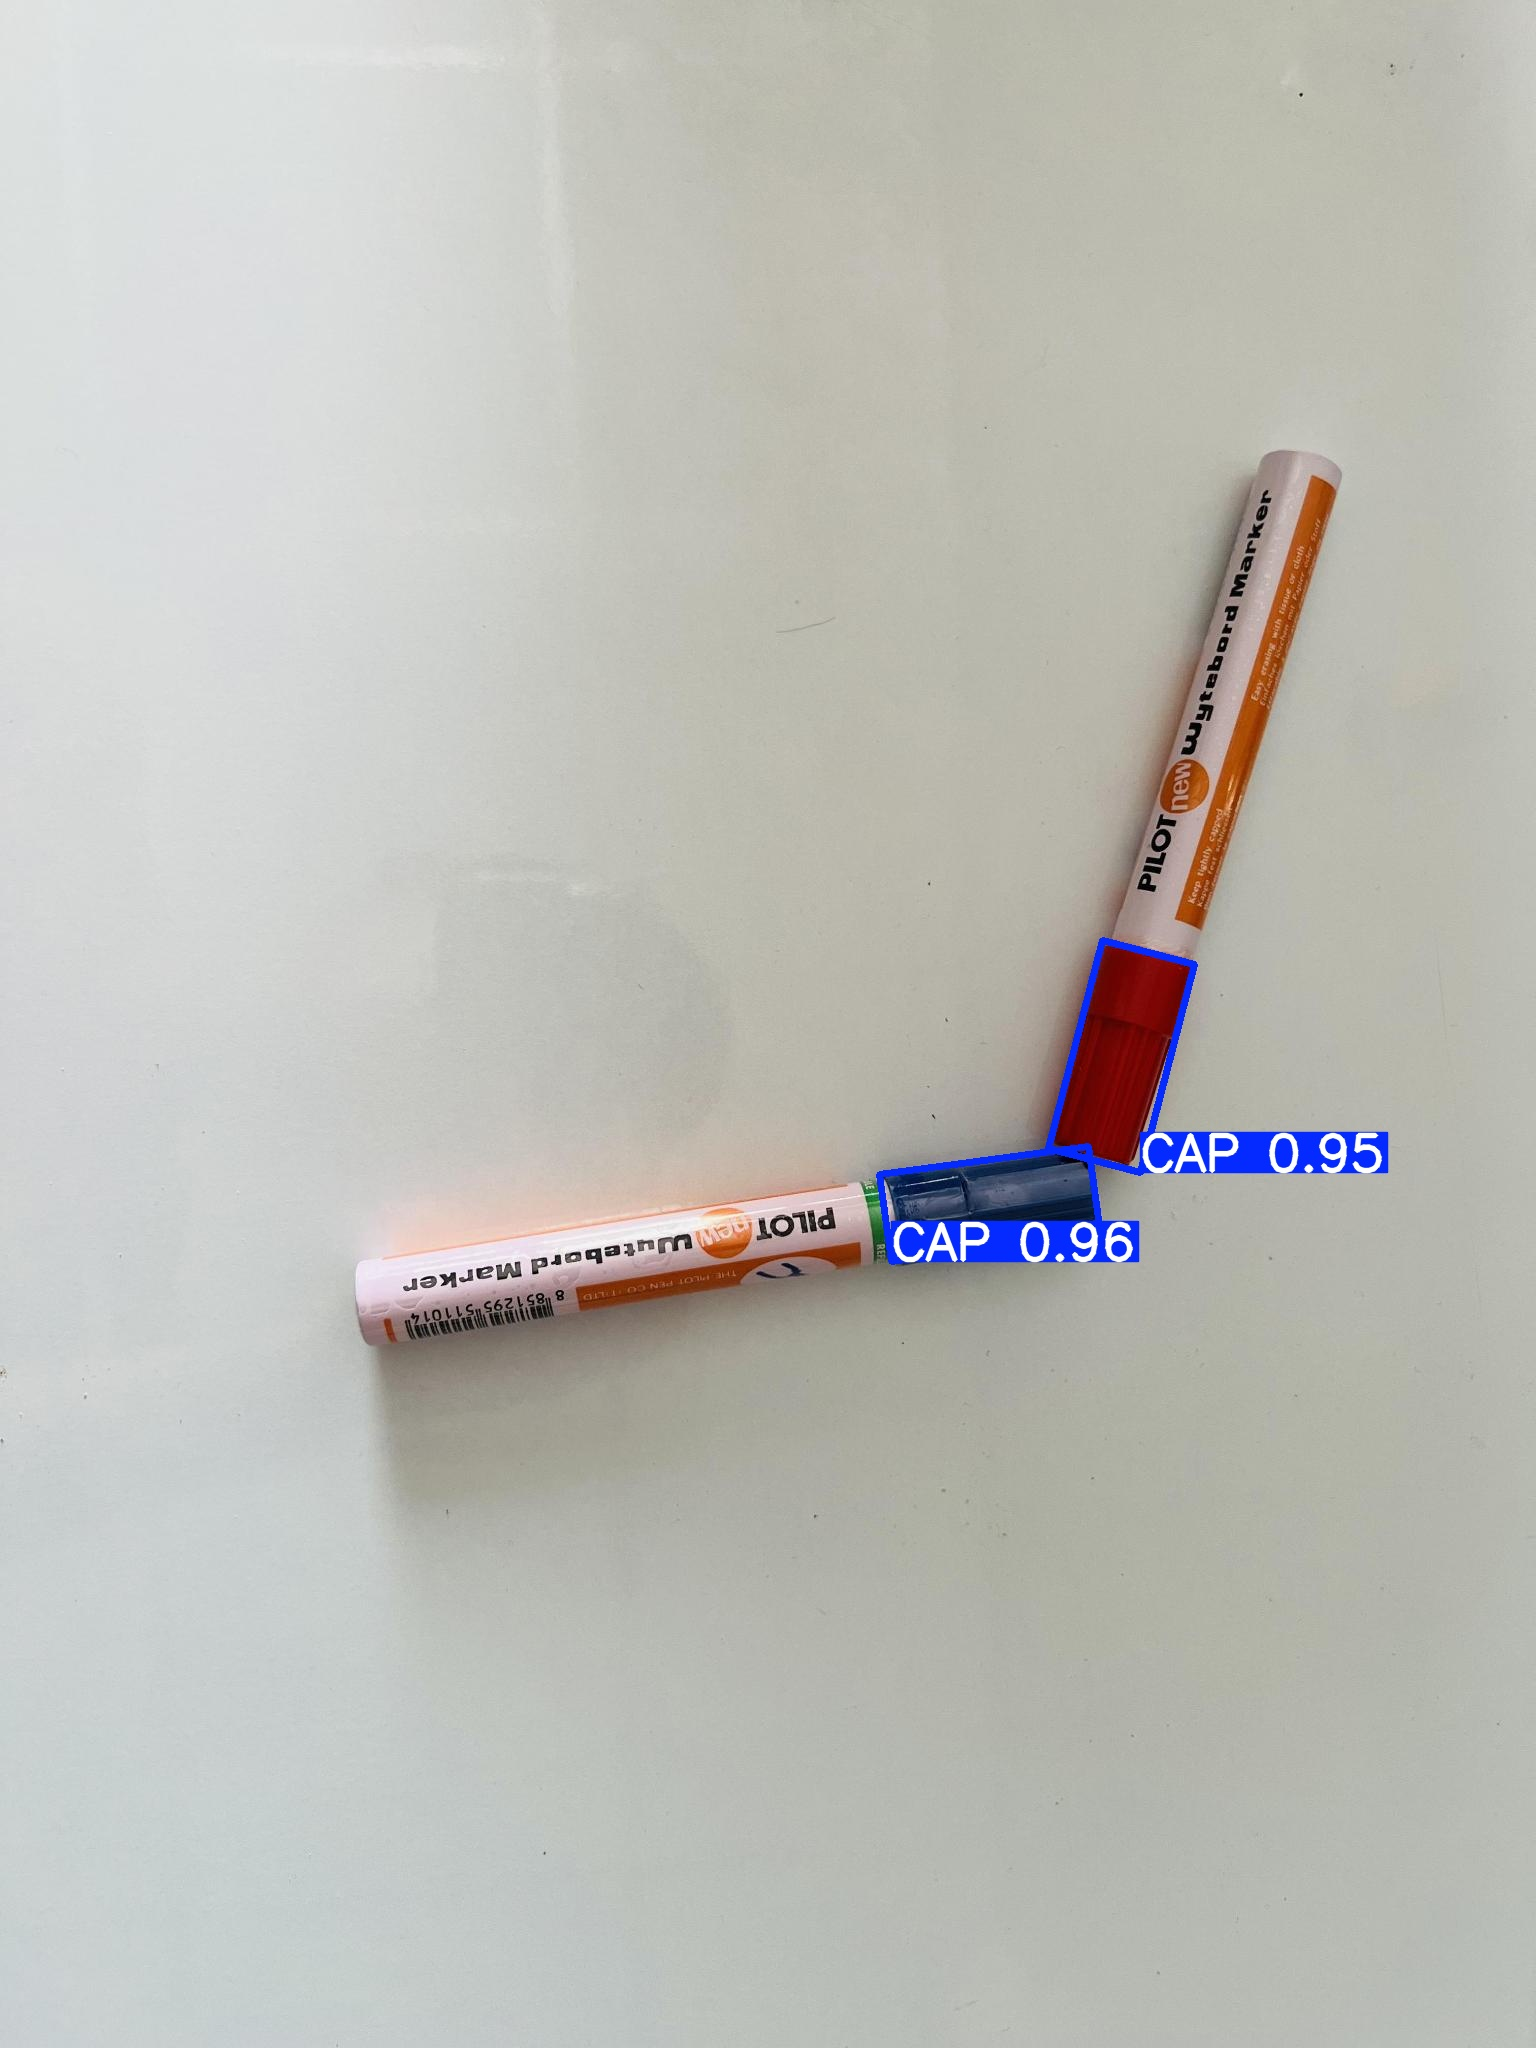

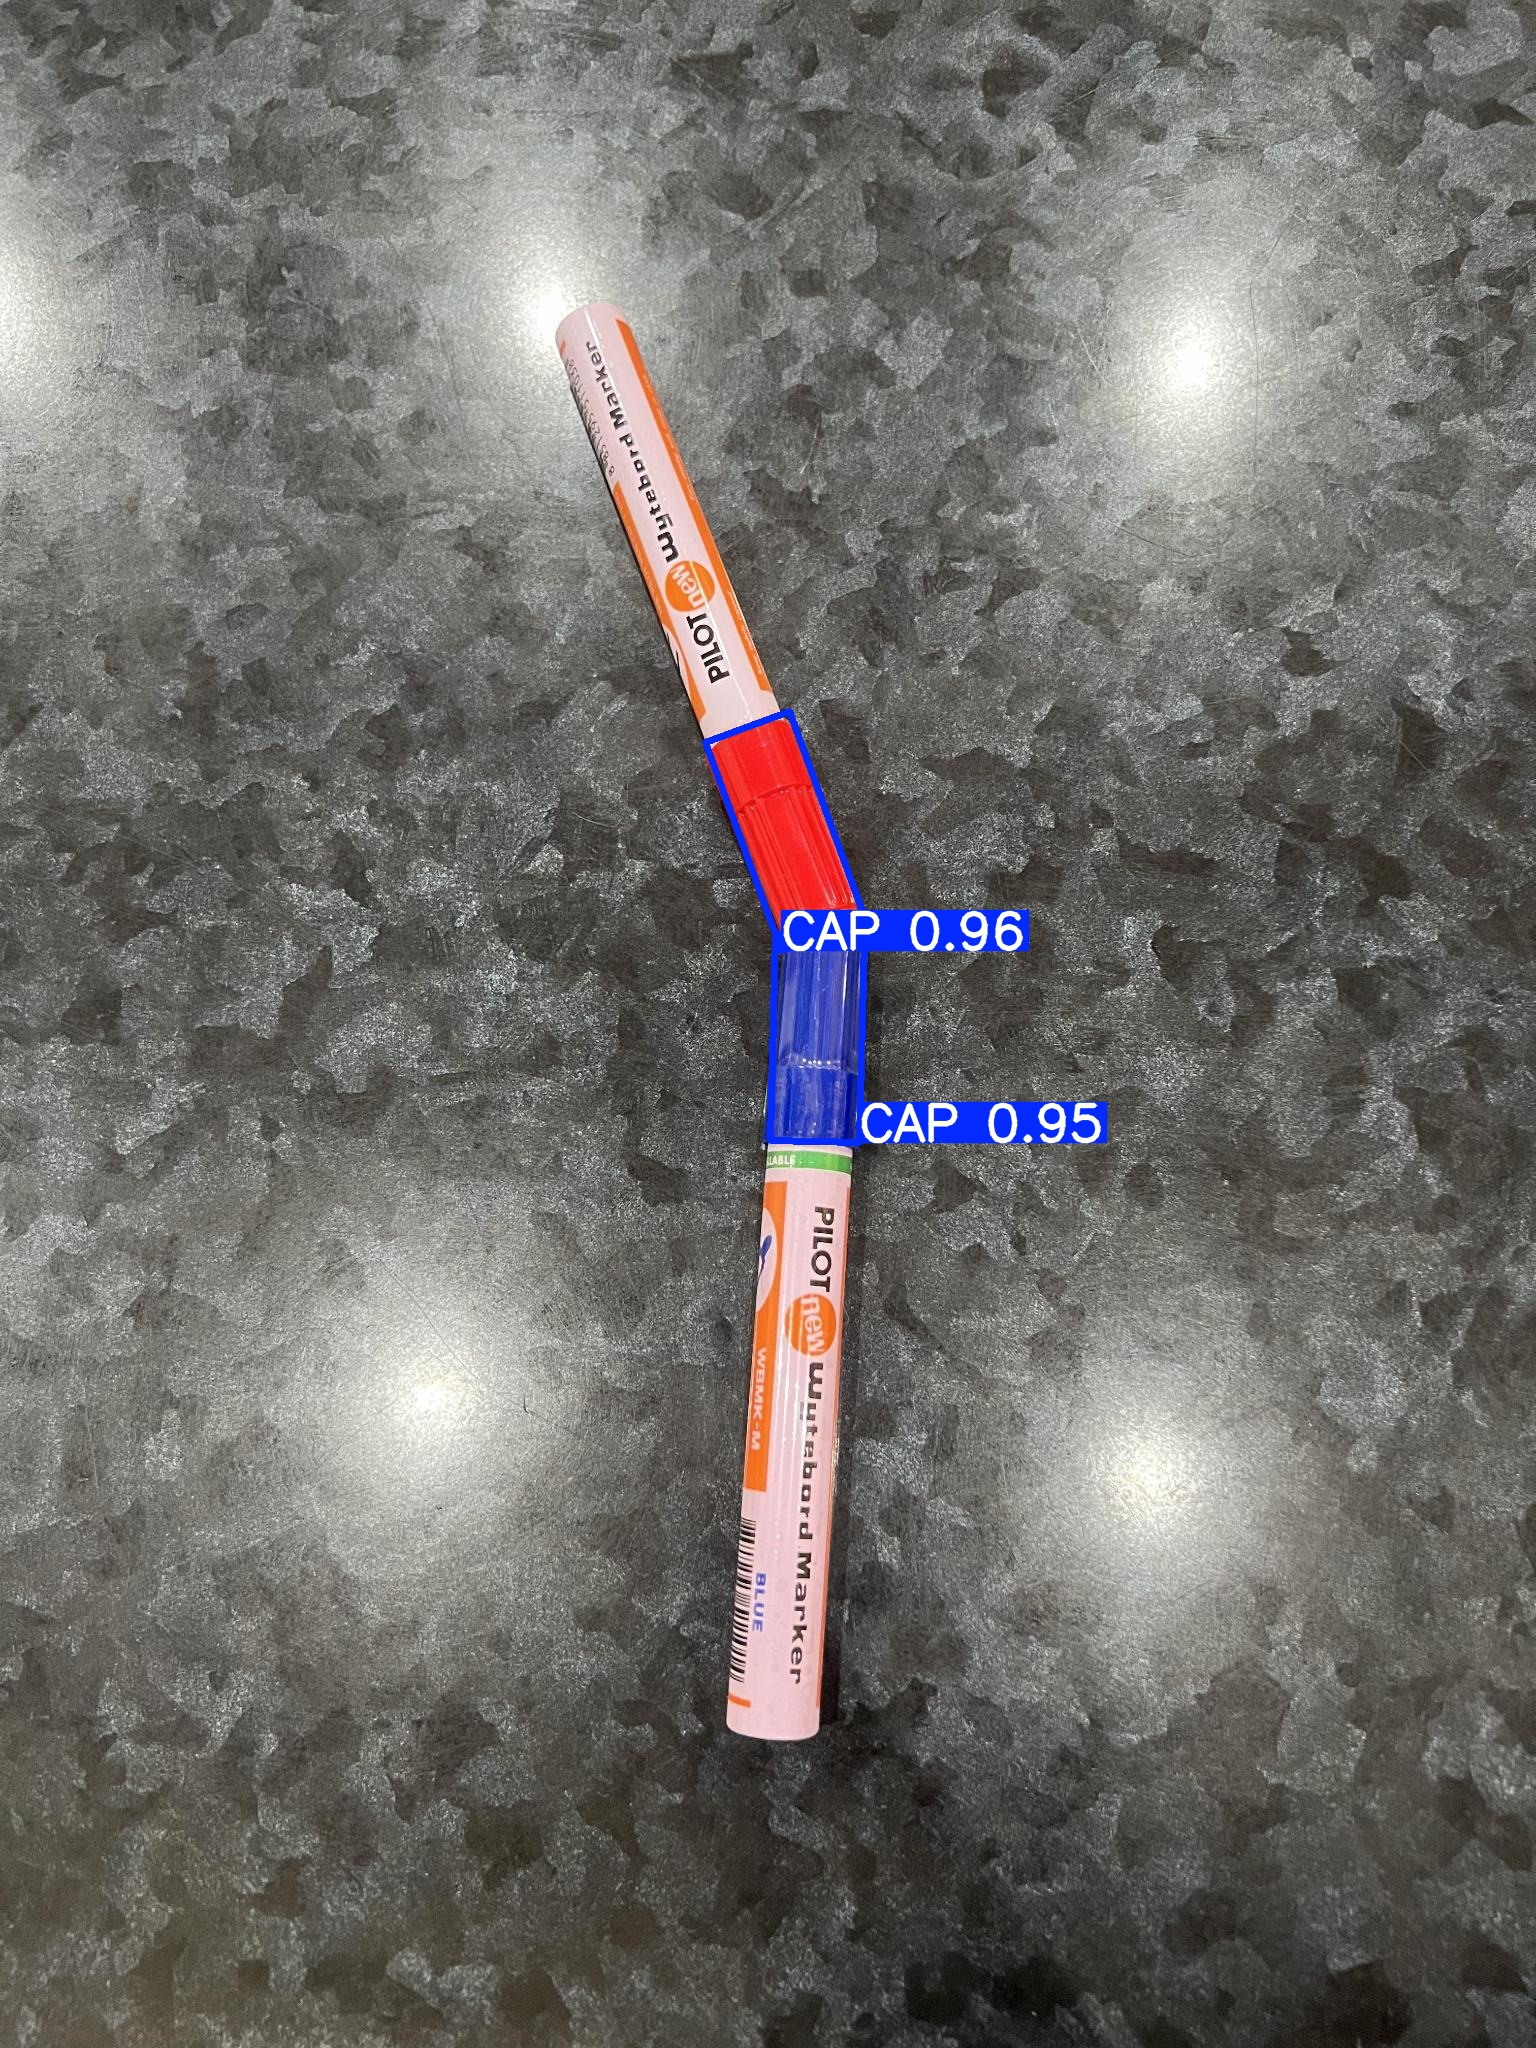

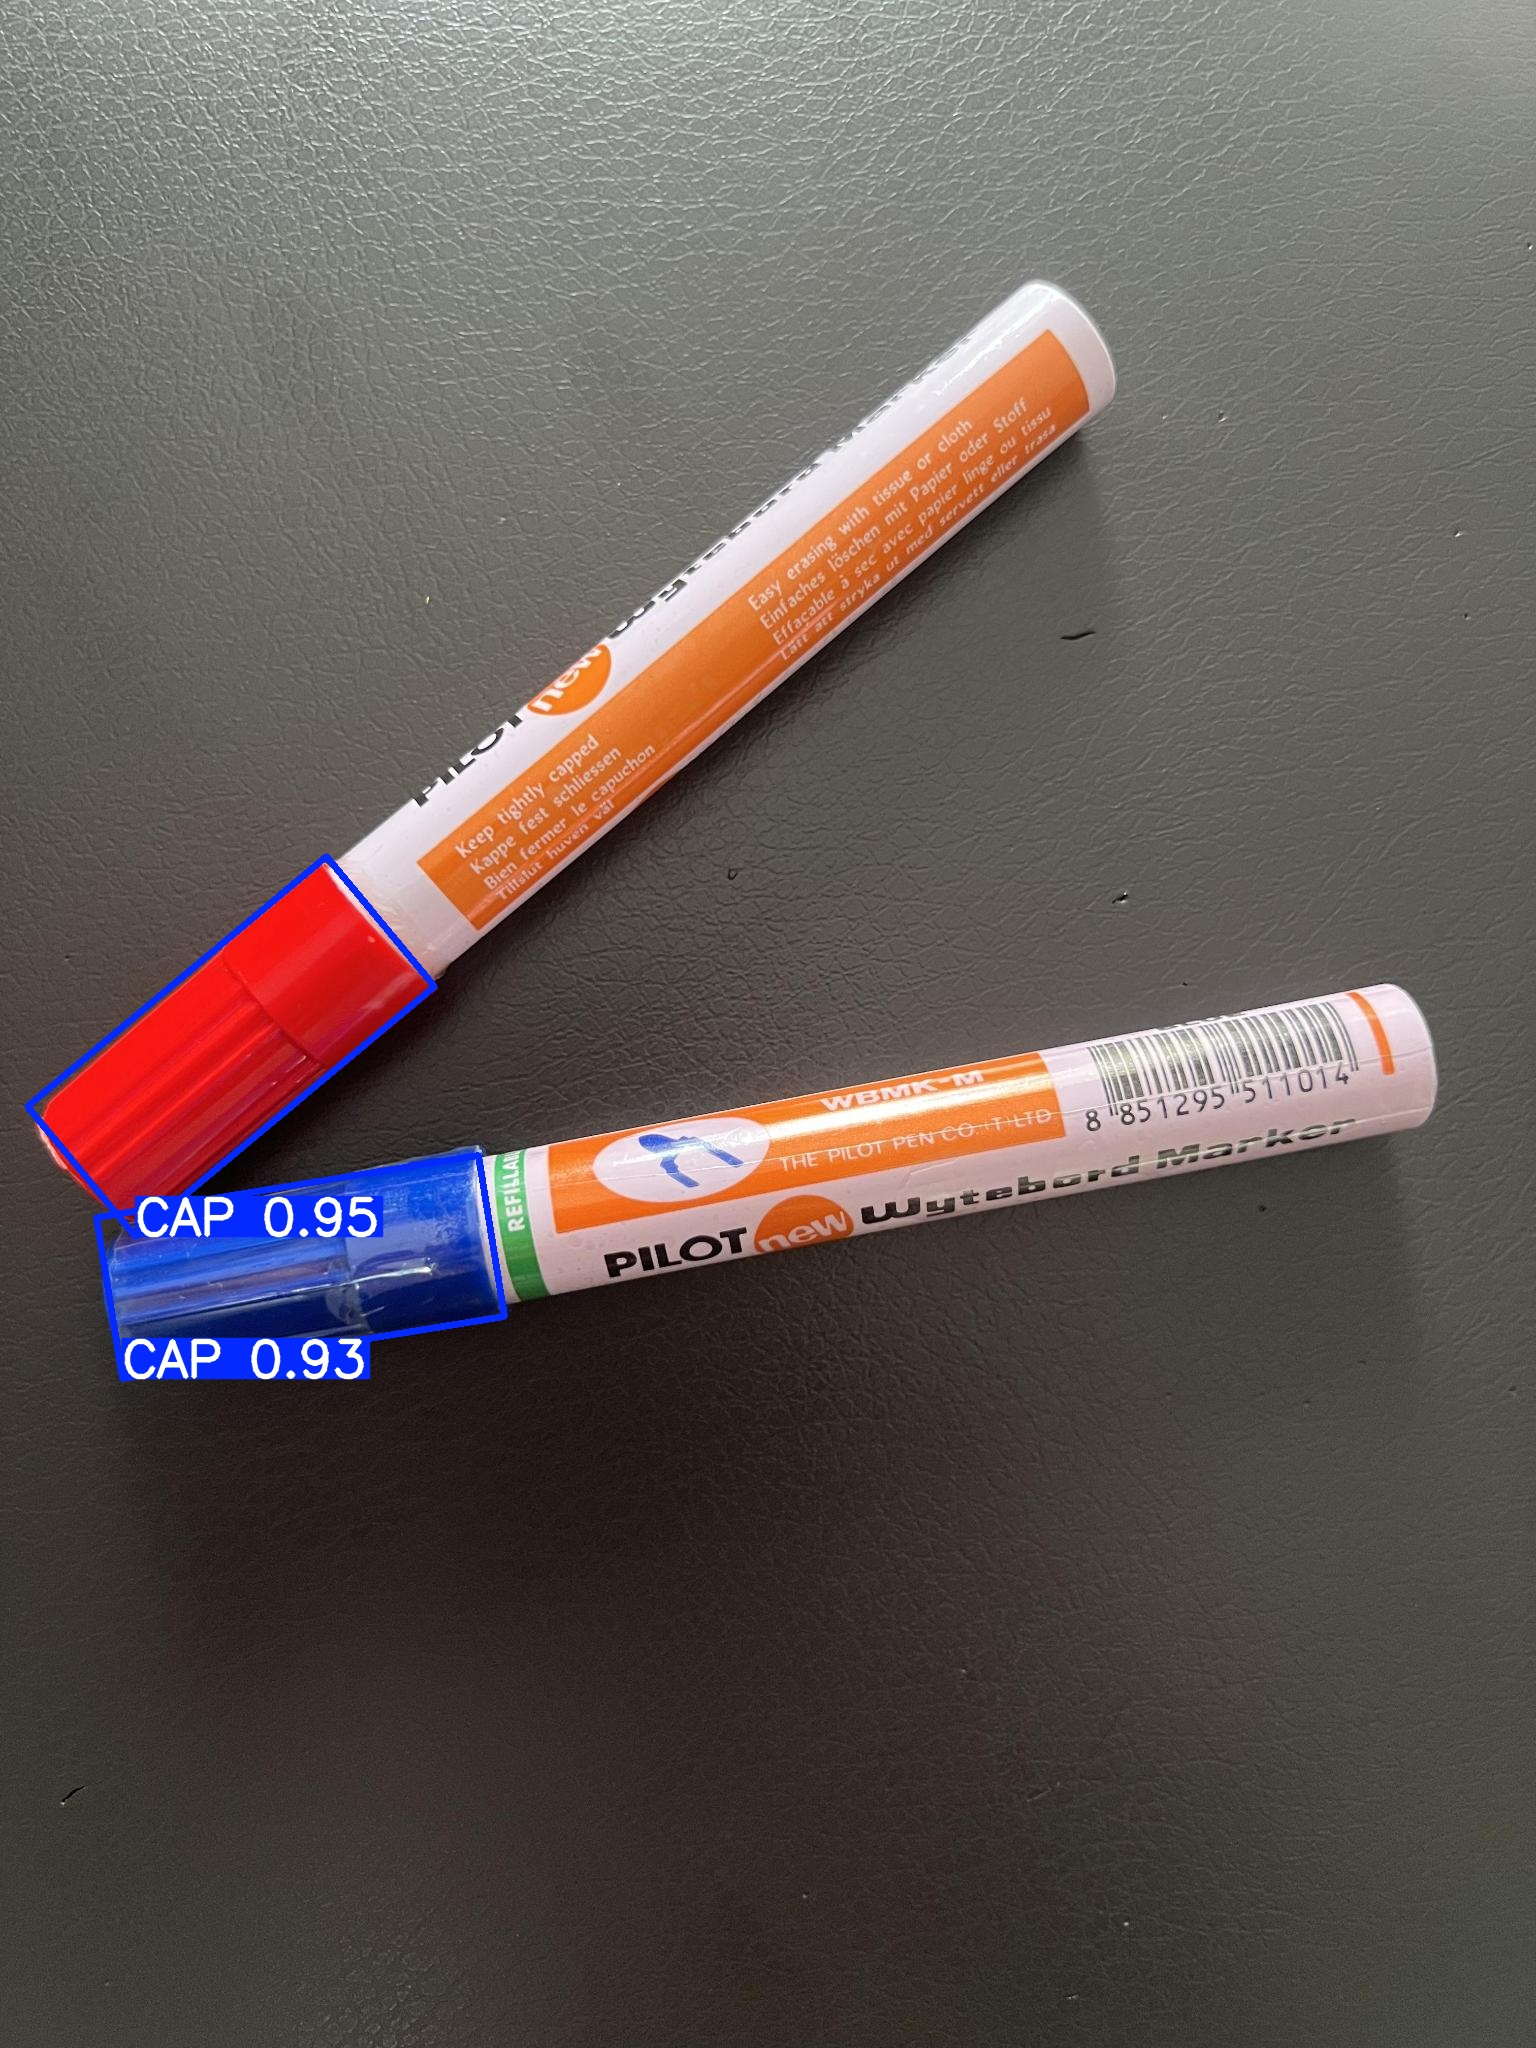

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/obb/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")